<a href="https://colab.research.google.com/github/priyansu-debug/Data_Mining-Data_Warehouse/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2177958 sha256=a6d397474da80cb9f038bb80a6ec57a09d0f9fe06e60d98181c63f6d707d4aa6
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
#load dataset
df = pd.read_csv('/content/mall_customers.csv')
print(df)
df.head()

#select relevent features
X= df[['age','annual_income','spending_score']]

#scale features
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

     customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]


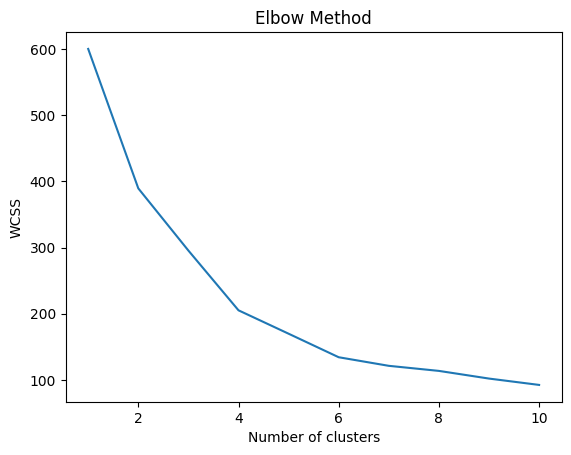

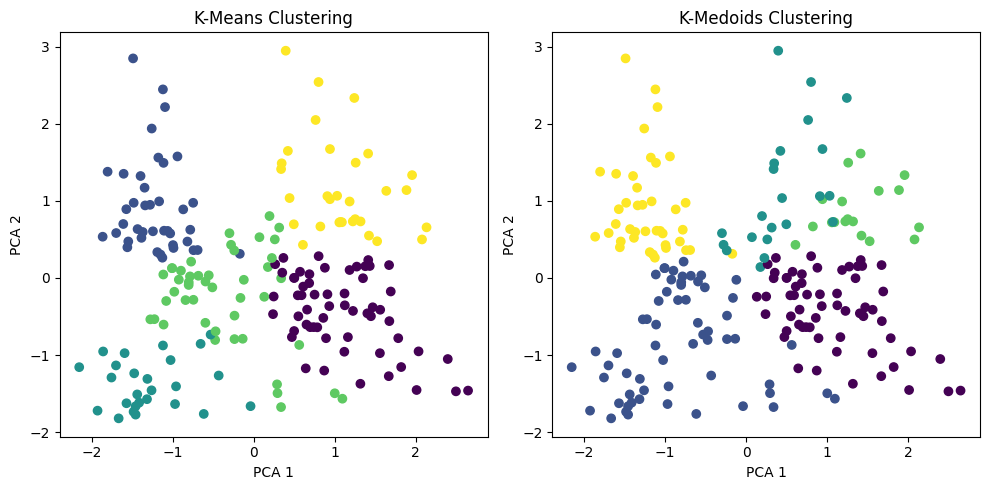

In [ ]:
#Apply K-Means
#Determine optional number of clusters (k) using ELbow Method
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42) # Added random_state for reproducibility
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

#Plot WCSS curve to find optimal k
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method') # Added a title for clarity
plt.show()

#Apply k-means clustering with optimal k
kmeans = KMeans(n_clusters=5, random_state=42) # Instantiate KMeans correctly
kmeans_labels=kmeans.fit_predict(X_scaled)

#Apply k medoids clustering with optimal k
kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# plot clusters
plt.figure(figsize=(10, 5))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# K-Medoids plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis')
plt.title('K-Medoids Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()